In [1]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 10 # 글자크기

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

In [19]:
df = pd.read_csv(url,header=None)
df

# 로지스틱 회귀 모델링을 하시오.

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [20]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22],
      dtype='int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [22]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
target = []
data = []

In [26]:
# 문자 => 숫자로 바꾸는 코드
# 아스키코드로 변환
for row_index,row in df.iterrows():
    target.append(row.loc[0]) # target결과 데이터 저장
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v)) # 1줄의 데이터를 숫자로 변경해서 list에 저장
        
    data.append(row_data)   # 1줄 리스트를 다시 리스트에 추가

df2 = pd.DataFrame(data)
df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,120,115,110,116,112,102,99,110,107,101,...,115,119,119,112,119,111,112,107,115,117
1,120,115,121,116,97,102,99,98,107,101,...,115,119,119,112,119,111,112,110,110,103
2,98,115,119,116,108,102,99,98,110,101,...,115,119,119,112,119,111,112,110,110,109
3,120,121,119,116,112,102,99,110,110,101,...,115,119,119,112,119,111,112,107,115,117
4,120,115,103,102,110,102,119,98,107,116,...,115,119,119,112,119,111,101,110,97,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,107,115,110,102,110,97,99,98,121,101,...,115,111,111,112,111,111,112,98,99,108
8120,120,115,110,102,110,97,99,98,121,101,...,115,111,111,112,110,111,112,98,118,108
8121,102,115,110,102,110,97,99,98,110,101,...,115,111,111,112,111,111,112,98,99,108
8122,107,121,110,102,121,102,99,110,98,116,...,107,119,119,112,119,111,101,119,118,108


In [86]:
pd.get_dummies(df[1])

,b,c,f,k,s,x
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
8119,False,False,False,True,False,False
8120,False,False,False,False,False,True
8121,False,False,True,False,False,False
8122,False,False,False,True,False,False


In [89]:
pd.get_dummies(df[2])

,f,g,s,y
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
8119,False,False,True,False
8120,False,False,True,False
8121,False,False,True,False
8122,False,False,False,True


In [98]:
a1 = pd.get_dummies(df.iloc[:,1], dtype=float)

In [106]:
len(df.columns)-1

22

In [107]:
# 원핫인코딩 만들기 - DataFrame 생성
one_hotEncording = df[0]
for i in range(len(df.columns)-1):
    t = pd.get_dummies(df.iloc[:,i+1], dtype=float)
    one_hotEncording = pd.concat([one_hotEncording,t],axis=1)

In [108]:
one_hotEncording

,0,b,c,f,k,s,x,f,g,s,...,s,v,y,d,g,l,m,p,u,w
0,p,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,p,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,e,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,p,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
# 원핫 인코딩으로 변환
target = [] # p,e 버섯종류 2가지
data = []
attr_list = []  # 22개 / 23개중 버섯 종류(target)를 뺌
for row_index,row in df.iterrows(): # df.iterrows() - index,row 넘겨줌.
    target.append(row.loc[0]) # target결과 데이터 저장
    row_data = []
    for col,v in enumerate(row.loc[1:]):
        if row_index == 0:
            attr = {"dic":{},"cnt":0}   # 컬럼에서 새로운 값이 몇번 나왔는지 확인.
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 원핫인코딩 변환
        d = [0]*12
        if v in attr["dic"]:
            idx = attr["dic"][v]    # idx = 0
            # print(idx)
        else:
            idx = attr["cnt"]   # idx = 0
            attr['dic'][v] = idx    # x:0
            # print(attr['dic'][v]) 
            attr["cnt"] += 1    # {"dic":{x:0},"cnt":1} 
            
        d[idx] = 1
        row_data += d # 원핫인코딩의 데이터 저장파일 - 데이터의 가중치때문에 정답률이 다를 수 있음.
    
    data.append(row_data)   # 1줄 리스트를 다시 리스트에 추가
    
# data[0]
# df2 = pd.DataFrame(data)
# df2

In [65]:
train_input,test_input,train_target,test_target = train_test_split(
    data,target,test_size=0.2,random_state=42
)

In [ ]:
# 버섯판별 DecisionTreeClassifier 적용
# max_depth: 3
# cross_validate

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [71]:
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9941529466071704
0.9913846153846154


In [80]:
from sklearn.model_selection import cross_validate
score = cross_validate(dt,train_input,train_target)
print("평균 검증 정답률 : ",np.mean(score['test_score']))

평균 검증 정답률 :  0.9979997631314028


In [81]:
from sklearn.model_selection import GridSearchCV
params = { 'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [82]:
dt = gs.best_estimator_
dt.score(train_input,train_target)

0.9995383905216187

In [83]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [84]:
gs.cv_results_['mean_test_score']

array([0.99938438, 0.99938438, 0.99892284, 0.99876899, 0.99876899])

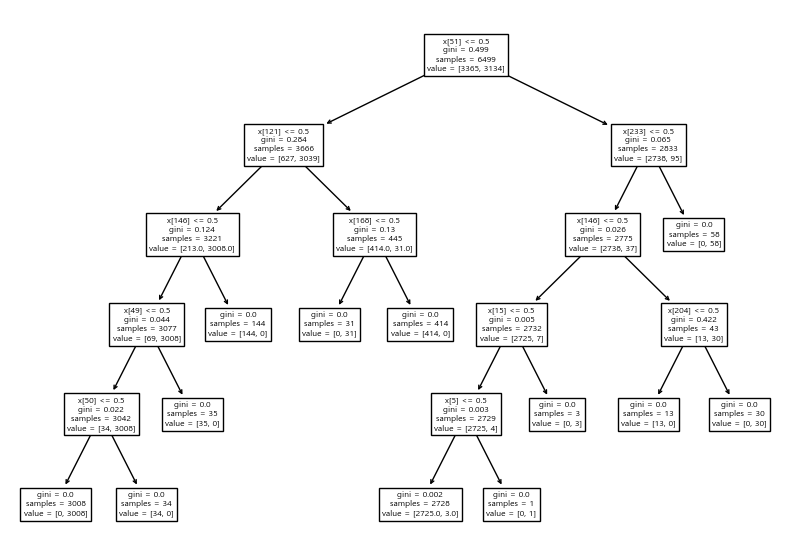

In [85]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

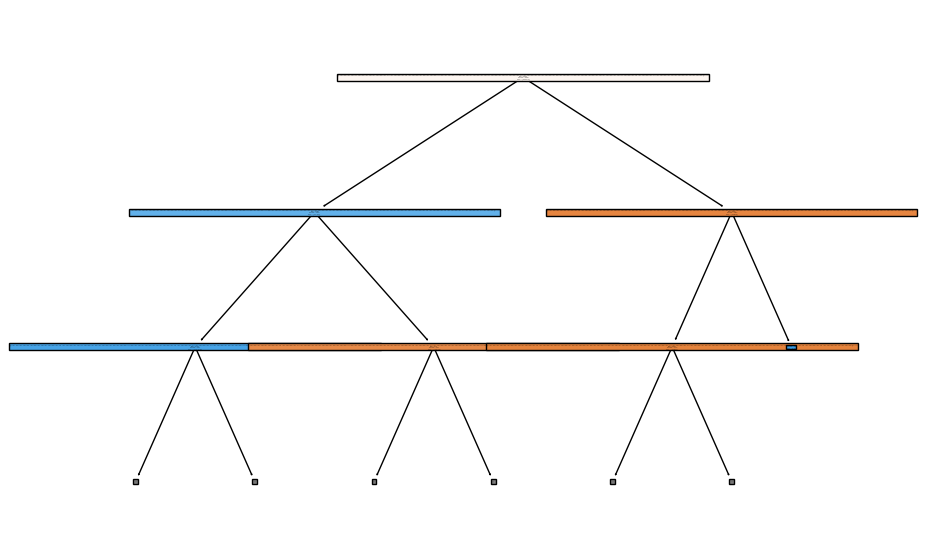

In [75]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=2,filled=True,feature_names=data)
plt.show()

In [76]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [77]:
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9995383905216187
1.0


In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,max_depth=3,filled=True,feature_names=df.columns)
plt.show()